2023-12-29 01:56:41.394067: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-29 01:56:41.492059: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-29 01:56:41.492085: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-29 01:56:41.523143: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-29 01:56:41.633668: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-29 01:56:41.635179: I tensorflow/core/platform/cpu_feature_guard.cc:1

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

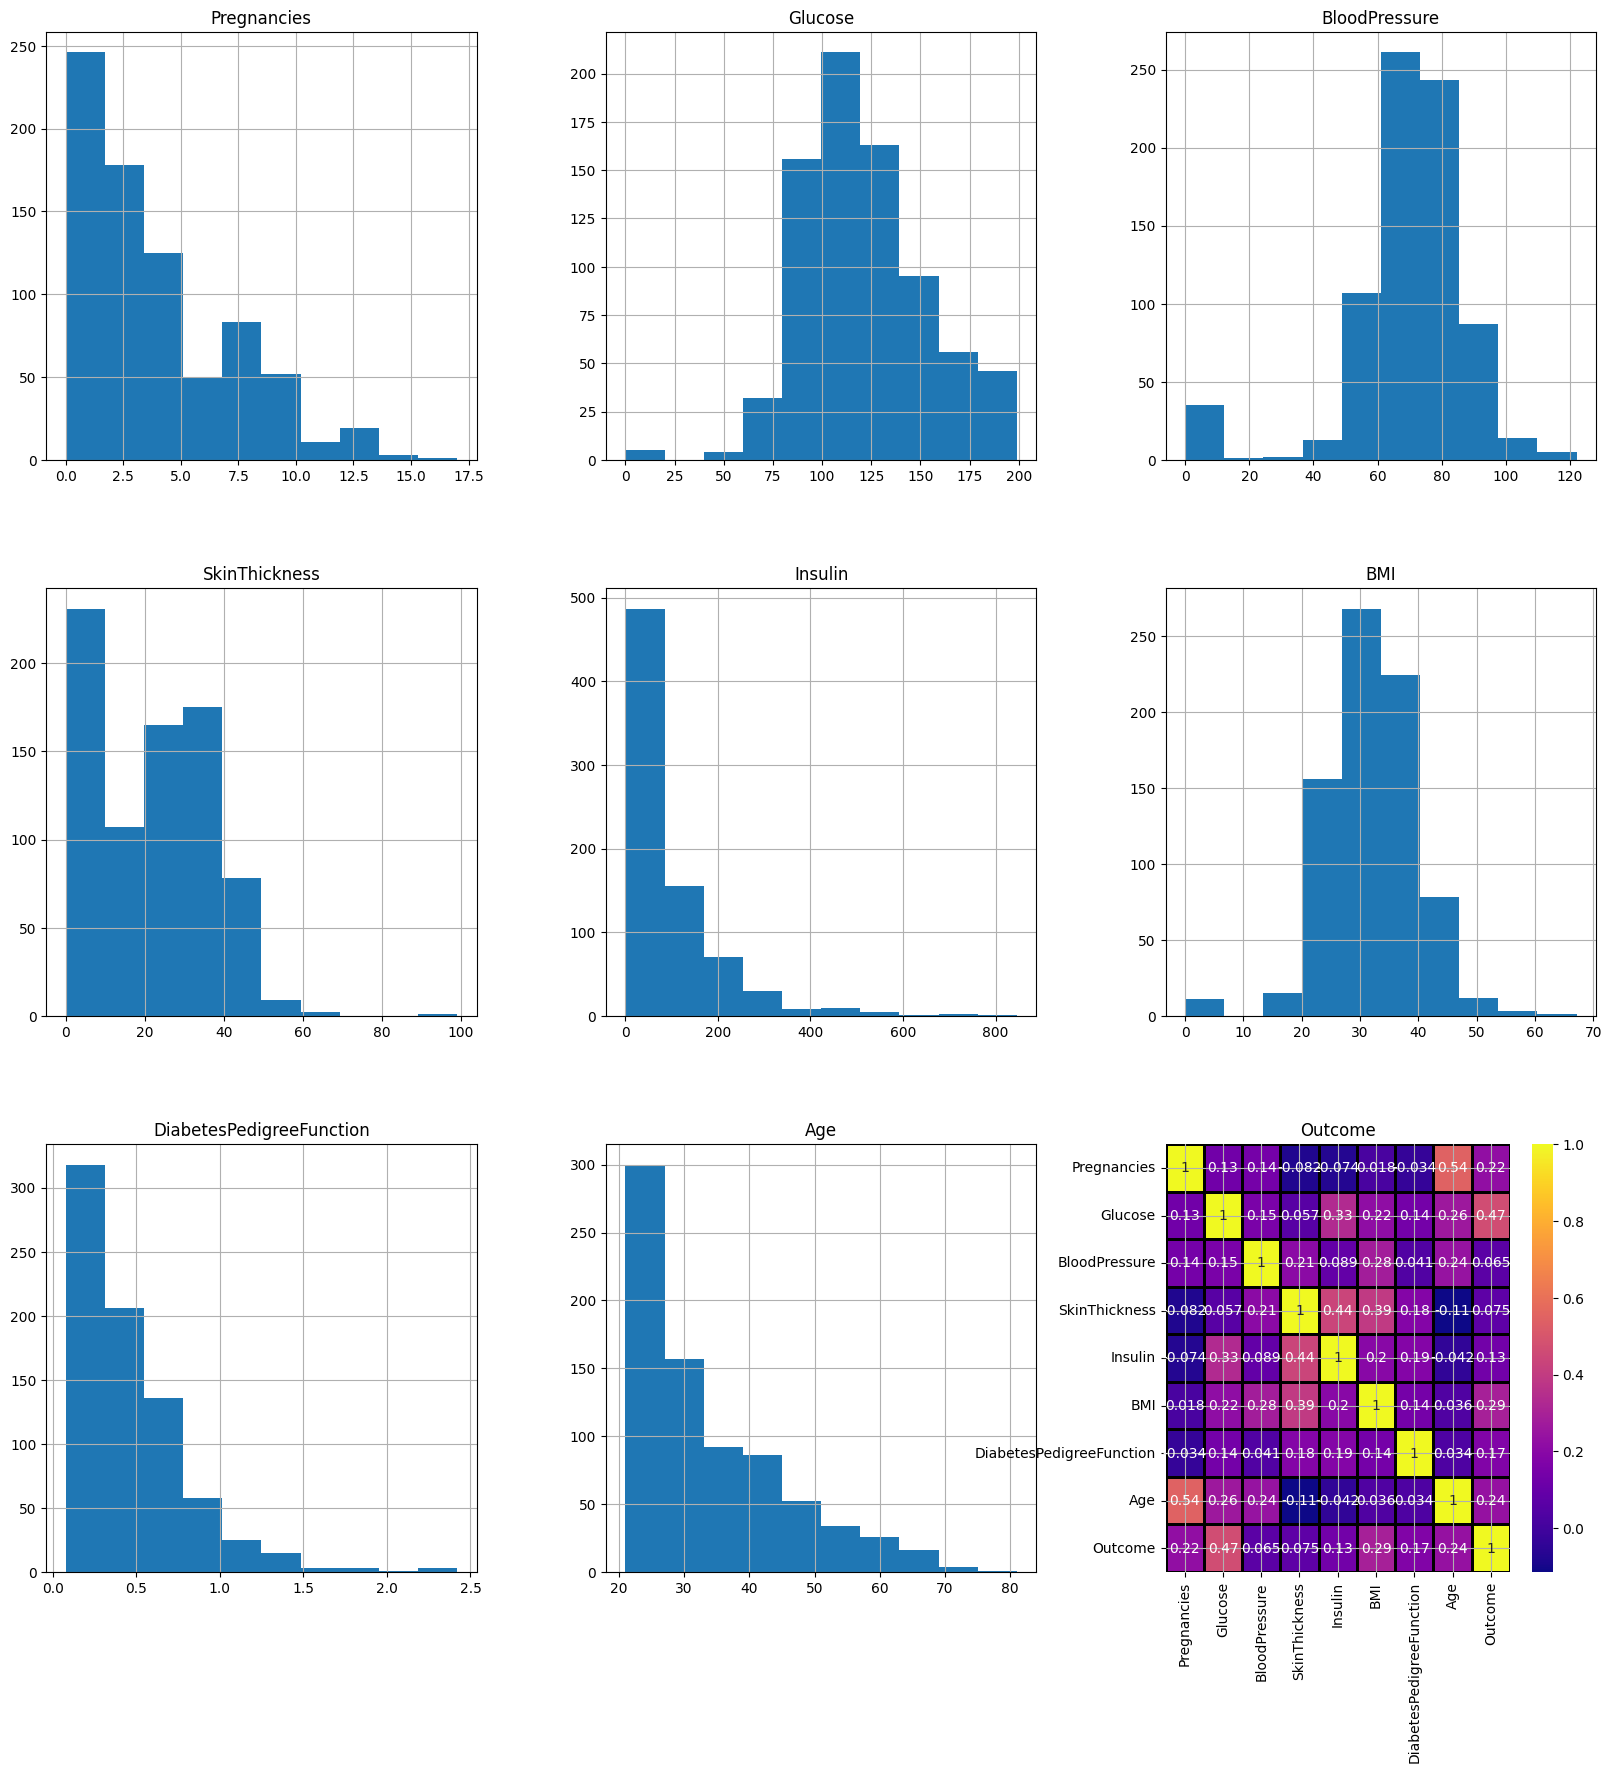

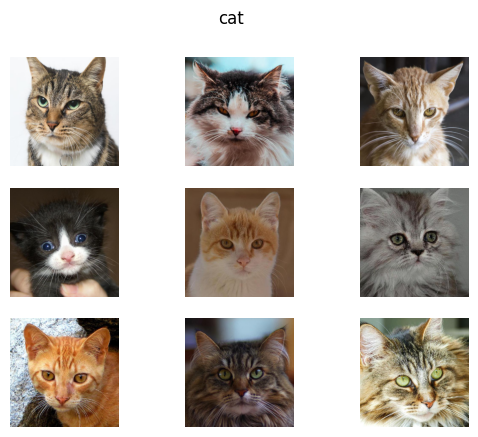

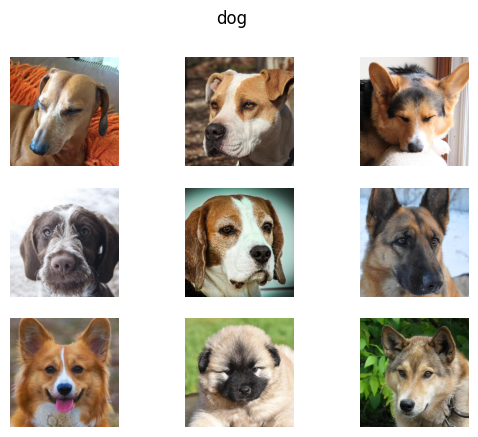

Epoch 1/10


2023-12-29 01:57:20.401840: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 167122560 exceeds 10% of free system memory.


248/248 [==============================] - 6s 22ms/step - loss: 0.3967 - accuracy: 0.8319
Epoch 2/10
248/248 [==============================] - 6s 22ms/step - loss: 0.1978 - accuracy: 0.9265
Epoch 3/10
248/248 [==============================] - 6s 22ms/step - loss: 0.1501 - accuracy: 0.9415
Epoch 4/10
248/248 [==============================] - 6s 23ms/step - loss: 0.1236 - accuracy: 0.9550
Epoch 5/10
248/248 [==============================] - 6s 23ms/step - loss: 0.0971 - accuracy: 0.9659
Epoch 6/10
248/248 [==============================] - 6s 23ms/step - loss: 0.0739 - accuracy: 0.9756
Epoch 7/10
248/248 [==============================] - 6s 22ms/step - loss: 0.0569 - accuracy: 0.9834
Epoch 8/10
248/248 [==============================] - 6s 22ms/step - loss: 0.0446 - accuracy: 0.9867
Epoch 9/10
 48/248 [====>.........................] - ETA: 4s - loss: 0.0309 - accuracy: 0.9941

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.src.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPool2D, Embedding, LSTM


def output(res):
    print('How much is lost : ', res[0])
    print('Accuracy is : ', res[1])
diabetes_df = pd.read_csv('diabetes.csv')
    
print(diabetes_df.head())
print(diabetes_df.describe())

p = diabetes_df.hist(figsize=(20, 20))

X = diabetes_df.drop(['Outcome'], axis=1)
y = diabetes_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

tc = diabetes_df.corr()

# plot a heatmap of the correlated data
sns.heatmap(tc, annot=True, cmap='plasma',
            linecolor='black', linewidths=1)

y_train = keras.utils.to_categorical(y_train, 2) 
y_test = keras.utils.to_categorical(y_test, 2)
model = keras.Sequential([keras.layers.Dense(20,input_shape=(8,),activation = 'relu'),
                            keras.layers.Dense(32,activation = 'relu'),
                            keras.layers.Dense(2,activation = 'softmax')])
model.compile(loss = "binary_crossentropy", optimizer = 'Adam', metrics = ['accuracy'])
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs = 48)

res = model.evaluate(X_test, y_test, verbose=0)
output(res)


import string, os, random, cv2
X = []
y = []
paths = []
dataset_path = '/home/maksym/MatMod3/afhq/train/'
cat = ['cat', 'dog']
for category in cat:
    figure, _ = plt.subplots(3,3)
    figure.suptitle(category)
    for k, v in enumerate(os.listdir(dataset_path+category)[:9]):

        image_form_dataset = plt.imread(dataset_path+category+'/'+v)
        plt.subplot(3, 3, k+1)
        plt.axis('off')
        plt.imshow(image_form_dataset)
    plt.show()

for k, category in enumerate(cat):
    for f in os.listdir(dataset_path + category):
        paths.append([dataset_path + category + '/' + f, k])

for path_buf in paths:
    image = cv2.imread(path_buf[0])
    image = cv2.resize(image, (55, 32))
    X.append(image)

    label = path_buf[1]
    y.append(label)

X = np.array(X, dtype="float") / 255
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)
y_train = np_utils.to_categorical(y_train, 2)
y_test = np_utils.to_categorical(y_test, 2)
model_task3 = Sequential()
model_task3.add(Conv2D(32, (2, 2), activation='relu', input_shape=(32, 55, 3)))
model_task3.add(MaxPool2D(pool_size=(2, 2)))
model_task3.add(Flatten())
model_task3.add(Dense(128, activation='relu'))
model_task3.add(Dense(2, activation='softmax'))
model_task3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model_task3.fit(X_train, y_train, batch_size=32, epochs=10)
res = model_task3.evaluate(X_test, y_test, verbose=0)
output(res)
